<a href="https://colab.research.google.com/github/Pawopiiieee/FloraAPI/blob/main/Topic_modeling_gensim_playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic modeling using gensim

In [1]:
import pandas as pd
data = pd.read_csv('google-playstore.csv');
(data.head(10))


/Users/pawopiiieee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [2]:
data_text = data[['App Name']]
data_text['index'] = data_text.index
documents = data_text.sample(2000)

# print(data_text)

/var/folders/z_/nkxn8qhx5h95fs489wh466rr0000gn/T/ipykernel_10384/41399936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [3]:
documents = documents.sort_values(by=['index'])
print((documents))

                                                  App Name    index
4457                                             Paint-Dot     4457
5023     Snovel: Audiobooks, Podcasts, Originals (Marathi)     5023
6495               Ton Ange Gardien  - Your Guardian Angel     6495
7329                                             SmartSong     7329
7416                                             Land Area     7416
...                                                    ...      ...
2308392                           Womens Ankle Boots Ideas  2308392
2310777                      English To Swahili Dictionary  2310777
2311420                                            Саха FM  2311420
2311689                                   Bee2waste Mobile  2311689
2312323                                      UniBS Library  2312323

[2000 rows x 2 columns]


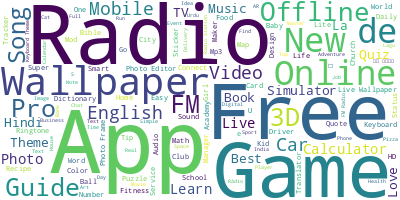

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
values = list(data_text['App Name'].values)
strings = map(str, values)
long_string = ','.join(strings)
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pawopiiieee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
def lemmatize_stemming(text):
    return lemmatizer.lemmatize(text)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
           # result.append(token)
            result.append(lemmatize_stemming(token))
    return result

In [7]:
doc_sample = documents[documents['index'] == 2310777].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['English', 'To', 'Swahili', 'Dictionary']


 tokenized and lemmatized document: 
['english', 'swahili', 'dictionary']


We now apply the preprocessing to all the headlines and print the first 10 results

In [8]:
processed_docs = documents['App Name'].map(preprocess)
### print the first 10 results
processed_docs[:10]

4457                                              [paint]
5023    [snovel, audiobooks, podcasts, original, marathi]
6495                     [ange, gardien, guardian, angel]
7329                                          [smartsong]
7416                                         [land, area]
7915         [mirza, kart, india, best, online, shopping]
9295                             [gold, life, foundation]
9302                                        [csea, alert]
9581                                           [gtronics]
9682                                             [decide]
Name: App Name, dtype: object

In [9]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 paint
1 audiobooks
2 marathi
3 original
4 podcasts
5 snovel
6 ange
7 angel
8 gardien
9 guardian
10 smartsong


In [10]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[300]

[(6, 1)]

(164, 1), (241, 1), (615, 1), (891, 1), (4161, 1), (4162, 1), (4163, 1)]

In [12]:
bow_doc_4310 = bow_corpus[300]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],
                                               dictionary[bow_doc_4310[i][0]],
bow_doc_4310[i][1]))

Word 6 ("game") appears 1 time.


In [13]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[]


[(0, 0.6152999901345029),
 (1, 0.3328037088259979),
 (2, 0.5684441376989424),
 (3, 0.43303449729536203)]

In [14]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [15]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.469*"theme" + 0.216*"wallpaper" + 0.098*"puzzle" + 0.052*"free" + 0.052*"music" + 0.052*"live" + 0.029*"radio" + 0.006*"game" + 0.005*"photo" + 0.005*"mobile"
Topic: 1 
Words: 0.530*"game" + 0.178*"live" + 0.069*"online" + 0.048*"photo" + 0.048*"offline" + 0.028*"puzzle" + 0.026*"radio" + 0.026*"wallpaper" + 0.026*"mobile" + 0.005*"free"
Topic: 2 
Words: 0.497*"puzzle" + 0.134*"keyboard" + 0.119*"theme" + 0.091*"game" + 0.049*"wallpaper" + 0.049*"live" + 0.025*"free" + 0.019*"photo" + 0.004*"radio" + 0.004*"mobile"
Topic: 3 
Words: 0.732*"radio" + 0.091*"online" + 0.069*"free" + 0.056*"live" + 0.016*"photo" + 0.011*"offline" + 0.008*"music" + 0.006*"game" + 0.006*"puzzle" + 0.001*"wallpaper"
Topic: 4 
Words: 0.384*"wallpaper" + 0.327*"game" + 0.084*"keyboard" + 0.064*"music" + 0.044*"free" + 0.024*"radio" + 0.024*"puzzle" + 0.024*"theme" + 0.005*"mobile" + 0.005*"photo"
Topic: 5 
Words: 0.341*"photo" + 0.308*"keyboard" + 0.244*"offline" + 0.073*"theme" + 0.011*"free"

## Running LDA using TF-IDF

In [16]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.468*"free" + 0.362*"game" + 0.068*"offline" + 0.038*"online" + 0.019*"mobile" + 0.013*"radio" + 0.010*"puzzle" + 0.008*"keyboard" + 0.006*"live" + 0.002*"wallpaper"
Topic: 1 Word: 0.358*"radio" + 0.231*"keyboard" + 0.216*"music" + 0.115*"wallpaper" + 0.040*"free" + 0.024*"online" + 0.006*"theme" + 0.001*"game" + 0.001*"mobile" + 0.001*"photo"
Topic: 2 Word: 0.816*"wallpaper" + 0.044*"mobile" + 0.024*"radio" + 0.024*"game" + 0.024*"music" + 0.020*"theme" + 0.018*"keyboard" + 0.005*"free" + 0.005*"photo" + 0.005*"online"
Topic: 3 Word: 0.466*"wallpaper" + 0.351*"game" + 0.054*"mobile" + 0.051*"free" + 0.027*"theme" + 0.021*"live" + 0.011*"photo" + 0.003*"radio" + 0.003*"online" + 0.003*"music"
Topic: 4 Word: 0.389*"theme" + 0.361*"offline" + 0.098*"keyboard" + 0.031*"radio" + 0.031*"puzzle" + 0.028*"live" + 0.017*"game" + 0.017*"online" + 0.013*"wallpaper" + 0.003*"free"
Topic: 5 Word: 0.831*"photo" + 0.067*"radio" + 0.051*"free" + 0.017*"music" + 0.004*"game" + 0.004*"w

In [17]:
processed_docs[2310777]

['english', 'swahili', 'dictionary']

In [18]:
for index, score in sorted(lda_model[bow_corpus[1990]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.10000000149011612	 
Topic: 0.469*"theme" + 0.216*"wallpaper" + 0.098*"puzzle" + 0.052*"free" + 0.052*"music" + 0.052*"live" + 0.029*"radio" + 0.006*"game" + 0.005*"photo" + 0.005*"mobile"

Score: 0.10000000149011612	 
Topic: 0.530*"game" + 0.178*"live" + 0.069*"online" + 0.048*"photo" + 0.048*"offline" + 0.028*"puzzle" + 0.026*"radio" + 0.026*"wallpaper" + 0.026*"mobile" + 0.005*"free"

Score: 0.10000000149011612	 
Topic: 0.497*"puzzle" + 0.134*"keyboard" + 0.119*"theme" + 0.091*"game" + 0.049*"wallpaper" + 0.049*"live" + 0.025*"free" + 0.019*"photo" + 0.004*"radio" + 0.004*"mobile"

Score: 0.10000000149011612	 
Topic: 0.732*"radio" + 0.091*"online" + 0.069*"free" + 0.056*"live" + 0.016*"photo" + 0.011*"offline" + 0.008*"music" + 0.006*"game" + 0.006*"puzzle" + 0.001*"wallpaper"

Score: 0.10000000149011612	 
Topic: 0.384*"wallpaper" + 0.327*"game" + 0.084*"keyboard" + 0.064*"music" + 0.044*"free" + 0.024*"radio" + 0.024*"puzzle" + 0.024*"theme" + 0.005*"mobile" + 0.005*"photo

In [19]:
!pip install pyLDAvis

In [20]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim as gensimvis

vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Users/pawopiiieee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/pawopiiieee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/pawopiiieee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/pawopiiieee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/pawopiiieee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:6

In [21]:
#get the top 20 words and their weights for a specific topic
topic_id=1
top_terms=20
for wordid, score in lda_model.get_topic_terms(topic_id, top_terms):
    print(wordid, ":", dictionary[wordid], ":", score)

6 : game : 0.52979636
11 : live : 0.17802015
0 : online : 0.06913897
9 : photo : 0.047782816
5 : offline : 0.047773737
7 : puzzle : 0.02789147
8 : radio : 0.026449729
2 : wallpaper : 0.026449714
4 : mobile : 0.026425282
3 : free : 0.005071332
10 : keyboard : 0.0050684614
12 : music : 0.0050675417
1 : theme : 0.0050643575


In [22]:
#### Utility function to get the id for a word
def get_id_for_word(dictionary, word):
    for k, v in dictionary.iteritems():
        if (v==word):
            return k
    return -1

In [23]:
top_terms=20
index=get_id_for_word(dictionary,'market')
for topic_id, score in lda_model.get_term_topics(index):
    print("Topic:", topic_id)
    for wordid, score in lda_model.get_topic_terms(topic_id, top_terms):
        print(wordid, ":", dictionary[wordid], ":", score)

Topic: 0
1 : theme : 0.468907
2 : wallpaper : 0.21608616
7 : puzzle : 0.098039754
3 : free : 0.051793195
12 : music : 0.051776037
11 : live : 0.051774904
8 : radio : 0.02865327
6 : game : 0.0055119107
9 : photo : 0.005494679
4 : mobile : 0.005492675
10 : keyboard : 0.0054909512
5 : offline : 0.005489902
0 : online : 0.0054895245
Topic: 4
2 : wallpaper : 0.3844494
6 : game : 0.32742256
10 : keyboard : 0.08355557
12 : music : 0.06383954
3 : free : 0.044129886
8 : radio : 0.02441434
7 : puzzle : 0.024396054
1 : theme : 0.02439526
4 : mobile : 0.0046837186
9 : photo : 0.0046820077
5 : offline : 0.004678735
11 : live : 0.0046772393
0 : online : 0.0046757464
Topic: 7
4 : mobile : 0.6311384
9 : photo : 0.12370412
12 : music : 0.08820523
2 : wallpaper : 0.083512336
8 : radio : 0.02197719
3 : free : 0.02197343
6 : game : 0.004229419
10 : keyboard : 0.0042132167
11 : live : 0.0042100265
5 : offline : 0.004209694
7 : puzzle : 0.0042094057
1 : theme : 0.0042087846
0 : online : 0.004208767
Topic: 9

## Saving and loading your model for re-use

Building a model takes time.Once you have a stable model, you can save it to disk and reload it later.

In [24]:
# Save model to disk.
from gensim.models import LdaModel
temp_file = "./model"
lda_model.save(temp_file)

# Load a potentially pretrained model from disk.
loaded_lda = LdaModel.load(temp_file)

## End of this notebook